In [182]:
# ! pip install numpy pillow svgwrite matplotlib pyspark tikzplotlib
# ! pip install matplotlib==2.2.3 --upgrade --force-reinstall

# CSV output handler

In [183]:
PERF_FILE = 'D:\Desktop\csbf\csvs\stdsuite-2-result.csv'
CONF_FILE = 'D:\Desktop\csbf\csvs\stdsuite-2-config.csv'
import pandas as pd

perf = pd.read_csv(PERF_FILE, delimiter='/')
conf = pd.read_csv(CONF_FILE, delimiter='/')

In [184]:
# from pyspark.sql import SparkSession
# spark = SparkSession.builder.appName('monitor_thesis').getOrCreate()
# perf = spark.read.csv(PERF_FILE, header=True, sep='/')
# conf = spark.read.csv(CONF_FILE, header=True, sep='/')

In [185]:
conf

,FilterID,FilterSize,Capacity,NumHashFunctions,FalsePositiveRate,NumItemsAdded,BucketSize
0,StdBF,5173957,400000,8,0.002,400000,1
1,CBF,5173957,400000,8,0.002,400000,4
2,DelBF,5225696,400000,8,0.002,400000,1
3,OHBF,5173957,400000,8,0.002,400000,1
4,ScalableSBF,7946712,600000,8,0.002,400000,1


In [186]:
perf_ = perf.groupby(['FilterID','TestCase']).mean(numeric_only=True).reset_index()
perf_

,FilterID,TestCase,AddOrRemoveTime,F1,F2,F3,F4,F5,TestSize,Accuracy,TestTime
0,CBF,Std Test 2,0.240793,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.397870
1,DelBF,Std Test 2,0.493945,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.407683
2,OHBF,Std Test 2,0.327897,0.0,0.0,410.2,420.0,442.2,1000000.0,0.998728,1.106051
3,ScalableSBF,Std Test 2,0.392145,0.0,0.0,423.4,425.6,420.2,1000000.0,0.998731,0.855107
4,StdBF,Std Test 2,0.430671,0.0,0.0,399.4,407.2,421.0,1000000.0,0.998772,1.348100


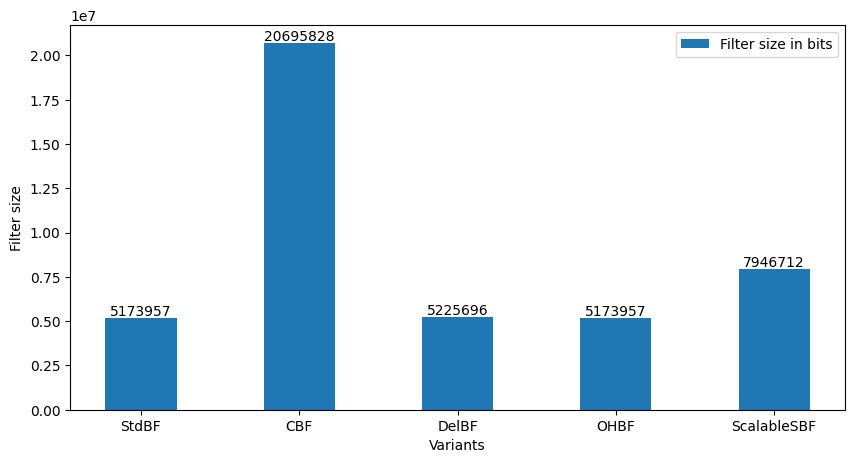

In [187]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = conf['FilterID']
values1 = conf['FilterSize'] * conf['BucketSize']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.45

plt.figure(figsize=(10, 5))

# Create the first set of bars
plt.bar(categories, values1, width, label='Filter size in bits')

for i, v in enumerate(values1):
    plt.text(i, v+150000, str(int(v)), ha='center')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Filter size')
# plt.title('Filters\' sizes in bit')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()

# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

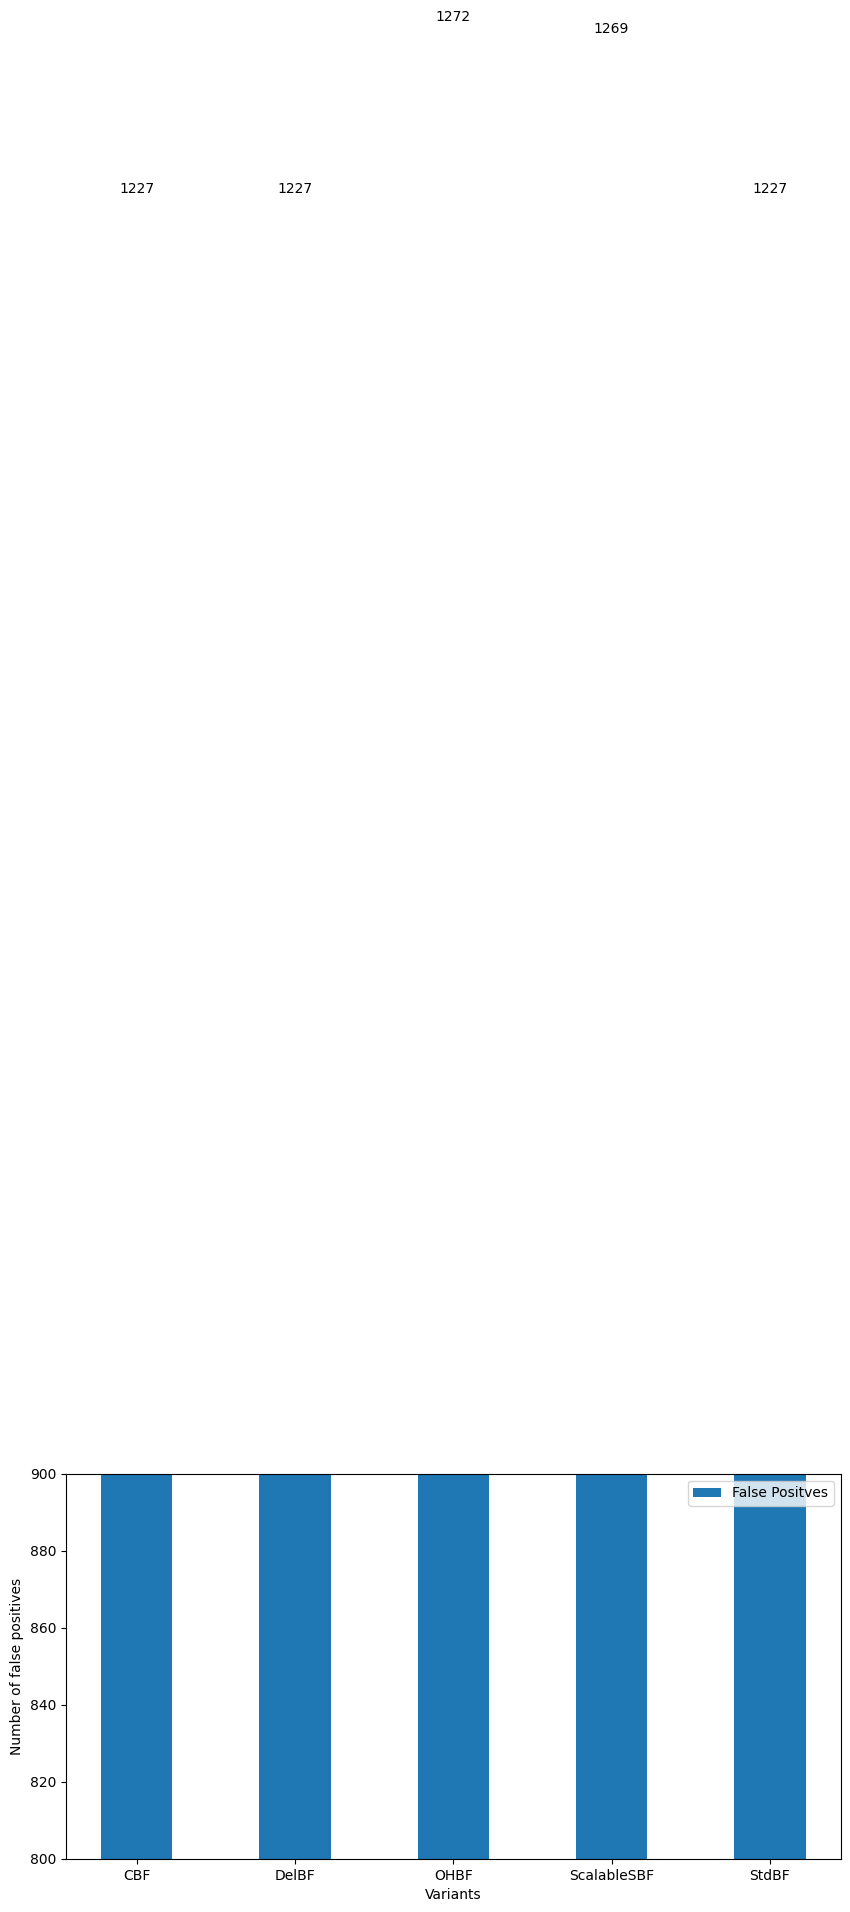

In [188]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['F4'] + perf_['F5'] + perf_['F3']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.45

plt.figure(figsize=(10, 5))

# Create the first set of bars
plt.bar(categories, values1, width, label='False Positves')
plt.ylim(bottom=800,top=900)

for i, v in enumerate(values1):
    plt.text(i, v+5, str(int(v)), ha='center')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Number of false positives')
# plt.title('False Positives in Test Suite of 1M entries')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()

# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

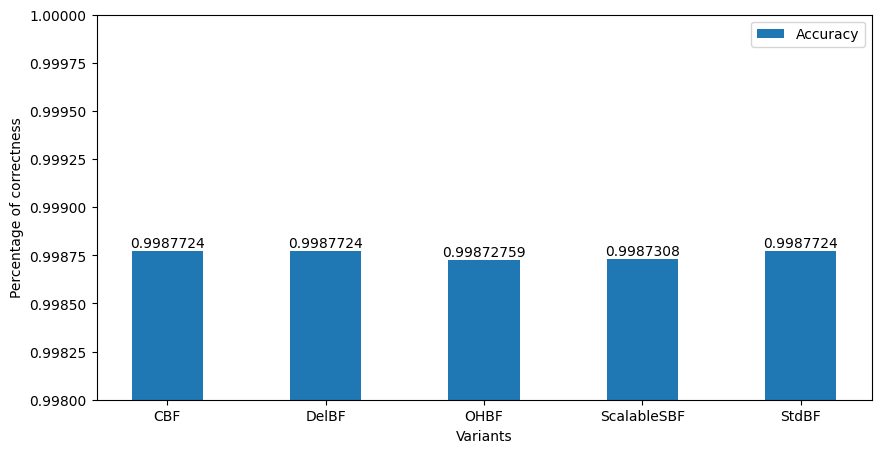

In [189]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['Accuracy']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.45

plt.figure(figsize=(10, 5))

# Create the first set of bars
ax = plt.bar(categories, values1, width, label='Accuracy')
plt.ylim(bottom=0.998,top=1)

for i, v in enumerate(values1):
    plt.text(i, v+0.00002, str(v)[:10], ha='center')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Percentage of correctness')
# plt.title('Accuracy of variants')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()
 
# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

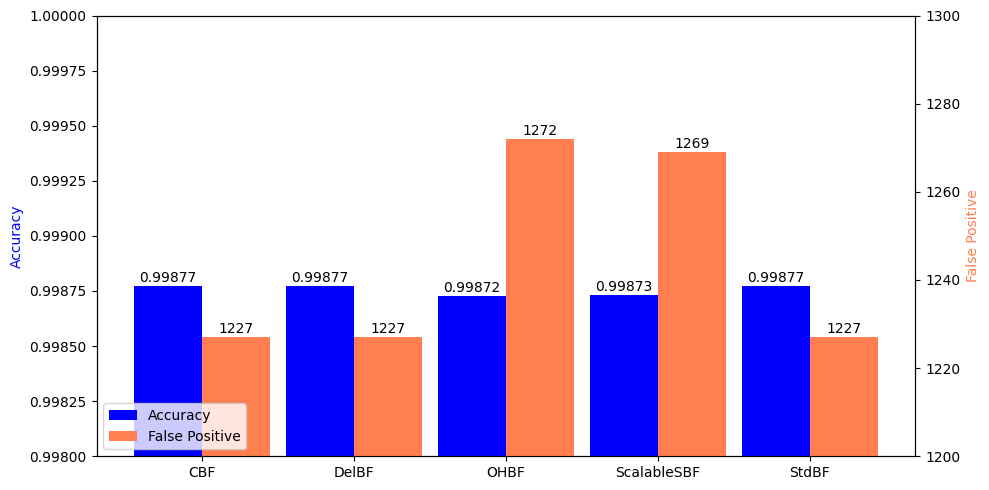

In [190]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['Accuracy']
values2 = (perf_['F3'] + perf_['F4'] + perf_['F5']).astype(int).tolist()

x = np.arange(len(categories))  # the label locations
width = 0.45  # the width of the bars

fig, ax1 = plt.subplots(figsize=(10, 5))  # Adjust figure size for better readability

# Plot the first set of bars (Sales)
rects1 = ax1.bar(x - width/2, values1, width, label='Accuracy', color='blue')
ax1.set_ylabel('Accuracy', color='blue')
ax1.tick_params(axis='y')

# Create a second y-axis
ax2 = ax1.twinx()

# Plot the second set of bars (Rating)
rects2 = ax2.bar(x + width/2, values2, width, label='False Positive', color='coral')
ax2.set_ylabel('False Positive', color='coral')
ax2.tick_params(axis='y')

# Set x-axis labels and title
ax1.set_xticks(x)
ax1.set_xticklabels(categories)
# plt.title('Double Bar Chart with Two Different Y-Axes')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
handles, labels = lines1 + lines2, labels1 + labels2
# Legend in lower left, outside the plot area
legend = ax2.legend(handles, labels, loc="lower left")
ax1.set_ylim(bottom=0.998, top=1)
ax2.set_ylim(bottom=1200,top=1300)

# Add value labels on top of bars (optional)
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height)[:7],
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 1),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1, ax1)
autolabel(rects2, ax2)

plt.tight_layout() #adjust layout to prevent labels from overlapping
plt.show()

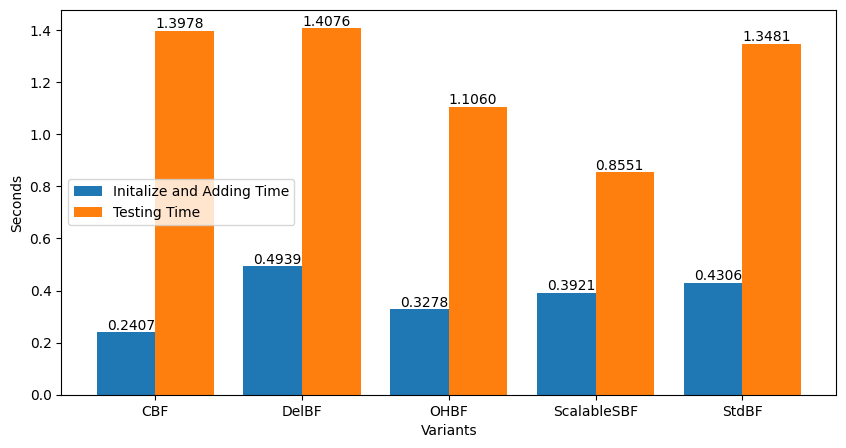

In [191]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
categories = perf_['FilterID']
values1 = perf_['AddOrRemoveTime']
values2 = perf_['TestTime']

# Set the positions of the bars on the x-axis
x = np.arange(len(categories))
width = 0.40

plt.figure(figsize=(10, 5))

# Create the first set of bars
plt.bar(x - width/2, values1, width, label='Initalize and Adding Time')

# Create the second set of bars
plt.bar(x + width/2, values2, width, label='Testing Time')

for i, v in enumerate(values1):
    plt.text(i, v+0.01, str(v)[:6], ha='right')
    
for i, v in enumerate(values2):
    plt.text(i, v+0.01, str(v)[:6], ha='left')

# Add labels, title, and legend
plt.xlabel('Variants')
plt.ylabel('Seconds')
# plt.title('Operation Time Consumptions')
plt.xticks(x, categories)
plt.legend()

# Display the chart
plt.show()

# ? Library to turn plot to Tex (conflicting with matplotlib)
# import tikzplotlib
# tikzplotlib.save('tex/samples.tex')

In [192]:
table_df = pd.merge(conf, perf_, on='FilterID', how='inner')
table_df['FalsePositive'] = table_df['F1'] + table_df['F2'] + table_df['F3'] + table_df['F4'] + table_df['F5']
table_df_ = table_df.drop(columns=['F1','F2','F3','F4','F5','TestCase'])
# table_df.drop('F1')
# table_df.drop('F2')
# table_df.drop('F3')
# table_df.drop('F4')
# table_df.drop('F5')
table_df_.head()

,FilterID,FilterSize,Capacity,NumHashFunctions,FalsePositiveRate,NumItemsAdded,BucketSize,AddOrRemoveTime,TestSize,Accuracy,TestTime,FalsePositive
0,StdBF,5173957,400000,8,0.002,400000,1,0.430671,1000000.0,0.998772,1.348100,1227.6
1,CBF,5173957,400000,8,0.002,400000,4,0.240793,1000000.0,0.998772,1.397870,1227.6
2,DelBF,5225696,400000,8,0.002,400000,1,0.493945,1000000.0,0.998772,1.407683,1227.6
3,OHBF,5173957,400000,8,0.002,400000,1,0.327897,1000000.0,0.998728,1.106051,1272.4
4,ScalableSBF,7946712,600000,8,0.002,400000,1,0.392145,1000000.0,0.998731,0.855107,1269.2


In [1]:
! pip install tabula

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Created wheel for tabula: filename=tabula-1.0.5-py3-none-any.whl size=10598 sha256=5c897c686a3c647b8b4c8b0348cfdafccd14e4a40d67bff9686847a49735f6b6
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\db\bb\71\f5d253c5eb10c8820dfd0590cd228e312b0768adc537466b45
Successfully built tabula


In [4]:
import pandas as pd
# Define the path for the uploaded PDF and the output CSV
tableData = [
    ['Structure', 'Counting', 'Grouping', 'Deletion', 'Scalability', 'Decay', 'Parallelism', 'FN', 'Comp-I', 'Comp-Q', 'Comp-D', 'Comp-M', 'Context'],
    ['Standard BF [1]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['CBF [36]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['kBF [19]', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'Yes', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'K-V store'],
    ['Loglog BF [115]', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'O(kd)', 'O(kd)', '−−', 'O(dk)', 'Smart Grid'],
    ['k-mer BF [133]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(2k)−O(3k)', '−−', 'O(2k)−O(3k)', 'Biometric'],
    ['Adaptive BF [116]', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k+N+1)', 'O(k+N+1)', '−−', 'O(k+N+1)', 'Networking'],
    ['Weighted BF [121]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Var. Len. Sin [119]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'O(t)', 'O(q)', 'O(k−d)', 'O(k)', 'Networking'],
    ['Pop. cons. BF [122]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k_i)', 'O(k_i)', '−−', 'O(k)', 'General'],
    ['Spectral BF [114]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'Networking'],
    ['Dynamic BF [91]', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'O(k)', 'O(sk)', 'O(sk)', 'O(sk)', 'Dynamic set'],
    ['DBA [92]', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'O(k)', 'O(rk)', 'O(rk)', 'O(rk)', 'Dynamic set'],
    ['Par-BF [93]', 'No', 'No', 'Yes', 'Yes', 'No', 'Yes', 'No', 'O(k)', 'O(ks_m)', 'O(ks_m)', 'O(ks_m)', 'Dynamic set'],
    ['Scalable BF [120]', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'O(k)', 'O(lk)', '−−', 'O(lk)', 'Dynamic set'],
    ['Spatial BF [17]', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'Spatial data'],
    ['Space-code BF [90]', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'O(ck)', 'O(lk)', '−−', 'O(lk)', 'Networking'],
    ['ICBF [20]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['BloomStore [18]', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'O(k)', 'O(xk)', '−−', 'O(xk)', 'Storage'],
    ['IBLT [21]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'K-V store'],
    ['Multi-class BF [3]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k_i)', 'O(k_i)', '−−', 'O(k_i)', 'Networking'],
    ['Optihash [69]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(1)', 'O(1)', '−−', 'O(1)', 'Networking'],
    ['FPF-MBF [43]', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'Networking'],
    ['Retouched BF [77]', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['MPCBF [79]', 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'O(k+1)', 'O(k+1)', 'O(k+1)', 'O(1)', 'General'],
    ['Ternary BF [136]', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['Selected Hash [80] [81]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Complement BF [75]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(2k)', '−−', 'O(2k)', 'General'],
    ['EGH filter [82]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['Cross-checking BF [74]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(αk)', '−−', 'O(αk)', 'General'],
    ['Generalized BF [78]', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Yes-no BF [76]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(2k)', '−−', 'O(2k)', 'General'],
    ['VI-CBF [85]', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(2k)', 'O(2k)', 'O(2k)', 'O(2k)', 'General'],
    ['FP-CBF [86]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['Dist. Sens. BF [145]', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Loc. Sens. BF [146]', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'O(2k)', 'O(2k)', '−−', 'O(2k)', 'General'],
    ['MLBF [144]', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'O(Lk+k\')', 'O(Lk+k\')', '−−', 'O(k)', 'General'],
    ['Deletable BF [135]', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(2k)', 'O(k)', 'General'],
    ['IBF [147]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'General'],
    ['Stable BF [137]', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'Duplication'],
    ['Temporal CBF [138]', 'No', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'Networking'],
    ['Double Buffering [139]', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'O(2k)', 'O(2k)', '−−', 'O(k)', 'Networking'],
    ['A2 Buffering [140]', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'O(2k)', 'O(2k)', '−−', 'O(2k)', 'Dynamic set'],
    ['Forgetful BF [141]', 'No', 'Yes', 'No', 'No', 'Yes', 'Yes', 'Yes', 'O(2k)', 'O(pk)', '−−', 'O(pk)', 'K-V store'],
    ['Bloomier filter [97]', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'O(n log n)', 'O(λk)', '−−', 'O(λk)', 'General'],
    ['Parallel BF [96]', 'Yes', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'O(pk)', 'O(pk)', 'O(pk)', 'O(pk)', 'Networking'],
    ['Less hash [87]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['One hash BF [88]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Compressed BF [101]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Compacted BF [102]', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'O(k)', 'O(k)', '−−', 'O(k)', 'General'],
    ['Combinatorial BF [99]', 'No', 'Yes', 'Yes', 'No', 'No', 'Yes', 'No', 'O(n_1k)', 'O(γk)', 'O(γk)', 'O(γk)', 'Networking'],
    ['Bloom-1 [94]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(1)', 'General'],
    ['OMASS [95]', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'O(k + 1)', 'O(k + 1)', '−−', 'O(1)', 'Networking'],
    ['Forest-struc. BF [108]', 'No', 'Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'O(k + 2)', 'O(lk)', '−−', 'O(lk)', 'Storage'],
    ['DLB-BF [98]', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'O(k)', 'O(k)', '−−', 'O(k)', 'Networking'],
    ['Ultra-fast BF [100]', 'No', 'Yes', 'No', 'No', 'No', 'Yes', 'No', 'O(k + 1)', 'O(k + 1)', '−−', 'O(k)', 'Implementation'],
    ['d-left CBF [103]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(d)', 'O(d)', 'O(d)', 'O(d)', 'Implementation'],
    ['L-CBF [113]', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'No', 'O(k)', 'O(k)', 'O(k)', 'O(k)', 'Implementation'],
    ['Mem. Opti. BF [104]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k + 1)', 'O(k + 1)', 'O(k + 1)', 'O(k + 1)', 'Storage'],
    ['Energy effic. BF [112]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k_1)−O(k)', '−−', 'O(k_1)−O(k)', 'Networking'],
    ['Pipelined BF [109] [110]', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'O(k)', 'O(k_1)−O(k)', '−−', 'O(k_1)−O(k)', 'Networking'],
    ['Matrix BF [105]', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'No', 'O(k)', 'O(k)', '−−', 'O(N k)', 'Copy detection'],
    ['Shifting BF [117]', 'Yes', 'Yes', 'Yes', 'No', 'No', 'No', 'No', 'O(λk)', 'O(λk)', 'O(λk)', 'O(λk)', 'General']
]

csvfile = './variants-table.csv'
pd.DataFrame(tableData).to_csv(csvfile)

In [2]:
import csv

# Data for the CSV
data = [
    ["Task", "Start Date", "End Date"],
    ["Research Novel Bloom Filter Variants", "Dec 2024", "Jan 2025"],
    ["Review recent articles and conference papers on Bloom filters", "Dec 2024 - Week 1", "Dec 2024 - Week 2"],
    ["Identify novel variants or improvements", "Dec 2024 - Week 3", "Dec 2024 - Week 4"],
    ["Summarize ideas and innovations in a literature review", "Dec 2024 - Week 5", "Dec 2024 - Week 6"],
    
    ["Implementing New Variants with Basic Configurations", "Jan 2025", "Feb 2025"],
    ["Implement the newly discovered Bloom filter variants", "Jan 2025 - Week 1", "Jan 2025 - Week 2"],
    ["Set up initial configurations for testing", "Jan 2025 - Week 3", "Jan 2025 - Week 4"],
    ["Perform basic functionality checks", "Jan 2025 - Week 5", "Jan 2025 - Week 6"],
    
    ["Research on New Hashing Techniques & Preliminary Implementations", "Feb 2025", "Feb 2025"],
    ["Investigate new hashing techniques (e.g., universal hashing)", "Feb 2025 - Week 1", "Feb 2025 - Week 2"],
    ["Integrate new hashing methods into Bloom filter variants", "Feb 2025 - Week 3", "Feb 2025 - Week 4"],
    ["Develop a preliminary implementation", "Feb 2025 - Week 4", "Feb 2025 - Week 4"],
    
    ["Designing Datasets for General Cases", "Feb 2025", "Mar 2025"],
    ["Research existing datasets for Bloom filter testing", "Feb 2025 - Week 1", "Feb 2025 - Week 2"],
    ["Design new datasets for general cases", "Feb 2025 - Week 3", "Feb 2025 - Week 4"],
    
    ["Defining and Refining Existing Case Study", "Mar 2025", "Mar 2025"],
    ["Review and refine the existing case study system design", "Mar 2025 - Week 1", "Mar 2025 - Week 1"],
    ["Update system and use case requirements", "Mar 2025 - Week 2", "Mar 2025 - Week 3"],
    ["Document the use case in detail", "Mar 2025 - Week 4", "Mar 2025 - Week 4"],
    
    ["Researching a New Case Study: Blacklisting Bank Accounts", "Mar 2025", "Apr 2025"],
    ["Conduct research on blacklisting bank accounts", "Mar 2025 - Week 1", "Mar 2025 - Week 2"],
    ["Explore how Bloom filters can help in the blacklisting process", "Mar 2025 - Week 3", "Mar 2025 - Week 3"],
    ["Formulate system and use case requirements for this case study", "Mar 2025 - Week 4", "Mar 2025 - Week 4"],
    
    ["Designing the Dataset for Each Case", "Apr 2025", "Apr 2025"],
    ["Design datasets specific to case studies", "Apr 2025 - Week 1", "Apr 2025 - Week 1"],
    ["Finalize the datasets for use in evaluation", "Apr 2025 - Week 2", "Apr 2025 - Week 3"],
    
    ["Research More Evaluation Metrics", "Apr 2025", "Apr 2025"],
    ["Identify additional evaluation metrics", "Apr 2025 - Week 1", "Apr 2025 - Week 1"],
    ["Test and refine evaluation metrics", "Apr 2025 - Week 2", "Apr 2025 - Week 3"],
    
    ["Refining the Evaluation Environment", "Apr 2025", "May 2025"],
    ["Refine testing and evaluation environment", "Apr 2025 - Week 1", "Apr 2025 - Week 1"],
    ["Integrate new Bloom filter variants with hashing techniques", "Apr 2025 - Week 2", "Apr 2025 - Week 3"],
    ["Ensure the environment is robust for large datasets", "Apr 2025 - Week 4", "Apr 2025 - Week 4"],
    
    ["Perform Evaluation and Synthesize Results", "May 2025", "May 2025"],
    ["Run evaluations for each Bloom filter variant", "May 2025 - Week 1", "May 2025 - Week 2"],
    ["Analyze results and compile data", "May 2025 - Week 3", "May 2025 - Week 3"],
    ["Write the final results section for the thesis", "May 2025 - Week 4", "May 2025 - Week 4"],
    
    ["Prepare Slides for Capstone Project Defense", "May 2025", "May 2025"],
    ["Design slides summarizing thesis work", "May 2025 - Week 1", "May 2025 - Week 2"],
    ["Practice presenting the thesis", "May 2025 - Week 3", "May 2025 - Week 3"],
    ["Finalize presentation and prepare for defense", "May 2025 - Week 4", "May 2025 - Week 4"]
]

# File path
file_path = "thesis_phase_12_2024_to_5_2025.csv"

# Writing to CSV
with open(file_path, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerows(data)

file_path  # Return file path for downloading the CSV


'thesis_phase_12_2024_to_5_2025.csv'